In [1]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
from copy import deepcopy
from pprint import pprint
import operator

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

## Dataset 2

In [2]:
data2 = pd.read_csv('datasets/housing_data.csv')
data2 = np.asarray(data2)

cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
data2.shape

(505, 14)

### Plot/visualize

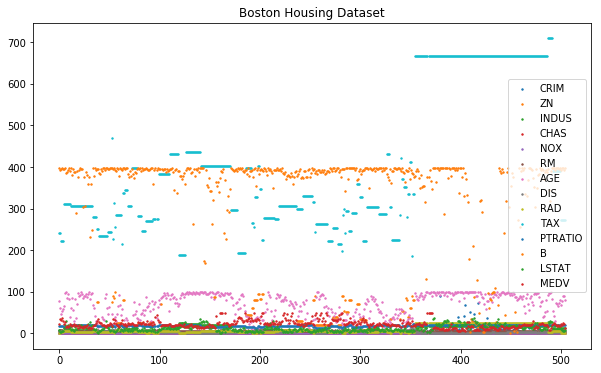

In [4]:
for idx, col in enumerate(cols):
    feature = data2[:, idx]
    plt.scatter(np.arange(len(feature)), feature, label=col, s=2)
    
plt.title('Boston Housing Dataset')
plt.legend()
plt.show()

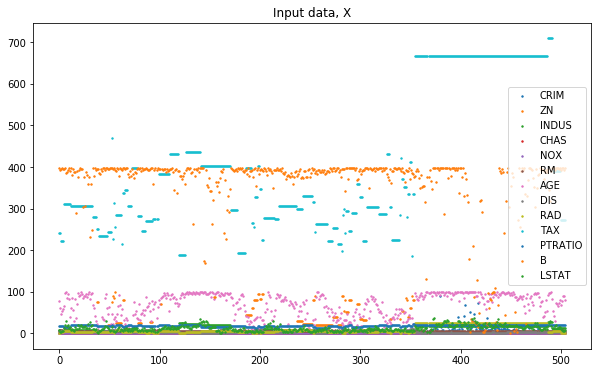

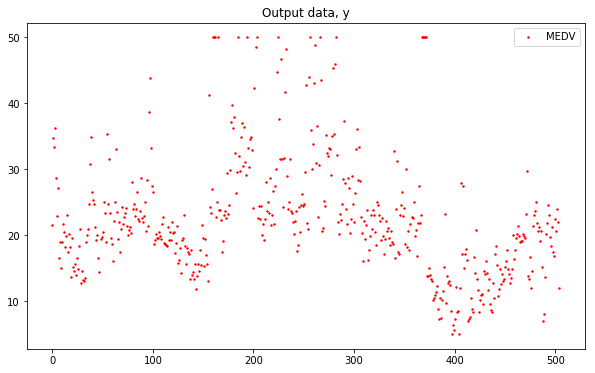

In [5]:
medv_idx = cols.index('MEDV')
y_ = data2[:, medv_idx]

data2_copy = np.copy(data2)
data2_copy = np.delete(data2_copy, medv_idx, axis=1)

X_ = data2_copy

for idx, col in enumerate(cols):
    if idx == medv_idx:
        pass
    elif idx > medv_idx:
        feature = X_[:, idx-1]
        plt.scatter(np.arange(len(feature)), feature, label=col, s=2)
    else:
        feature = X_[:, idx]
        plt.scatter(np.arange(len(feature)), feature, label=col, s=2)
    
plt.title('Input data, X')
plt.legend()
plt.show()

plt.scatter(np.arange(len(y_)), y_, label='MEDV', s=2, c='r')
plt.title('Output data, y')
plt.legend()
plt.show()

### Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def rmse(y_1, y_2):
    return np.sqrt(mean_squared_error(y_1, y_2))

In [7]:
# randomly shuffling arrays
p = np.random.permutation(X_.shape[0])
X = X_[p]
y = y_[p]

print(X.shape)
print(y.shape)

(505, 13)
(505,)


##### Vanilla Linear Regression

In [8]:
model = LinearRegression()

kf = KFold(n_splits=10)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
    print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
    print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

RMSE Training for fold 0 = 4.567269624557367
RMSE Testing for fold 0 = 5.646777553162531
RMSE Training for fold 1 = 4.802364116072414
RMSE Testing for fold 1 = 3.392924273114144
RMSE Training for fold 2 = 4.637505827079905
RMSE Testing for fold 2 = 5.067961852130279
RMSE Training for fold 3 = 4.729519967096231
RMSE Testing for fold 3 = 4.233005909841409
RMSE Training for fold 4 = 4.69698963989815
RMSE Testing for fold 4 = 4.6359443459180865
RMSE Training for fold 5 = 4.744412733049652
RMSE Testing for fold 5 = 4.069283311173555
RMSE Training for fold 6 = 4.502486871343873
RMSE Testing for fold 6 = 6.246517271410165
RMSE Training for fold 7 = 4.67358621484172
RMSE Testing for fold 7 = 4.809467604923005
RMSE Training for fold 8 = 4.7376467616311215
RMSE Testing for fold 8 = 4.204390988535835
RMSE Training for fold 9 = 4.563284896256776
RMSE Testing for fold 9 = 5.644514857531298
--
RMSE Training average = 4.66550666518272
RMSE Testing average  = 4.79507879677403
RMSE overall = 4.67606457

##### Finding significance of each feature

In [9]:
rmse_sig_train = {}
rmse_sig_test = {}

cols_trimmed = deepcopy(cols)
del cols_trimmed[cols_trimmed.index('MEDV')]

for i in range(X.shape[1]):
    # remove this column from X:
    X_trimmed = np.delete(X, np.s_[i:i+1], axis=1)
    
    # perform 10-fold cross-validation, saving the averaged result:
    model = LinearRegression()

    kf = KFold(n_splits=10)
    rmse_per_fold_train = []
    rmse_per_fold_test = []
    
    for trainset, testset in kf.split(X):
        X_train, X_test = X_trimmed[trainset], X_trimmed[testset]
        y_train, y_test = y[trainset], y[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
        rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))

    rmse_sig_train[cols_trimmed[i]] = np.average(rmse_per_fold_train)
    rmse_sig_test[cols_trimmed[i]] = np.average(rmse_per_fold_test)
    
print('Training RMSE when removing each variable:')
pprint(rmse_sig_train)
print('')

print('Testing RMSE when removing each variable:')
pprint(rmse_sig_test)

print('')
print('Original RMSE: {}'.format(rmse_avg_test))
sorted_x = sorted(rmse_sig_test.items(), key=operator.itemgetter(1), reverse=True)
pprint(sorted_x)

Training RMSE when removing each variable:
{'AGE': 4.666616146599543,
 'B': 4.723378318093146,
 'CHAS': 4.712076458607122,
 'CRIM': 4.716465382126016,
 'DIS': 4.9196609260546005,
 'INDUS': 4.666022405422881,
 'LSTAT': 5.154777822803121,
 'NOX': 4.766459630377879,
 'PTRATIO': 4.913946086175313,
 'RAD': 4.76262902082229,
 'RM': 5.0455333964013755,
 'TAX': 4.714417939072846,
 'ZN': 4.719135582324403}

Testing RMSE when removing each variable:
{'AGE': 4.7742777265463765,
 'B': 4.832577951959216,
 'CHAS': 4.803674802992539,
 'CRIM': 4.833108598967678,
 'DIS': 5.074936956921403,
 'INDUS': 4.790044513027442,
 'LSTAT': 5.195296556090095,
 'NOX': 4.8634943486093425,
 'PTRATIO': 5.069252307619897,
 'RAD': 4.885389589131508,
 'RM': 5.154506482516353,
 'TAX': 4.844572809888506,
 'ZN': 4.845699829293327}

Original RMSE: 4.79507879677403
[('LSTAT', 5.195296556090095),
 ('RM', 5.154506482516353),
 ('DIS', 5.074936956921403),
 ('PTRATIO', 5.069252307619897),
 ('RAD', 4.885389589131508),
 ('NOX', 4.863

LSTAT, RM, and DIS are the 3 variables with the most impact to the model, because they raise the RMSE the highest when removed from training.

##### Measuring significance using p and t values

In [10]:
# using code from this source:
# https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

from scipy import stats

model = LinearRegression()
model.fit(X,y)
params = np.append(model.intercept_,model.coef_)
predictions = model.predict(X)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["p values"] = [params,sd_b,ts_b,p_values]

# print(len(params))
# print(len(cols_trimmed))
myDF3["Variables"] = ["const"] + cols_trimmed
myDF3 = myDF3.set_index("Variables")

print(myDF3)

           Coefficients  Standard Errors  t values  p values
Variables                                                   
const           36.6349            5.102     7.180     0.000
CRIM            -0.1074            0.033    -3.270     0.001
ZN               0.0461            0.014     3.361     0.001
INDUS            0.0143            0.062     0.231     0.817
CHAS             2.6711            0.861     3.102     0.002
NOX            -17.6336            3.819    -4.618     0.000
RM               3.7943            0.418     9.081     0.000
AGE              0.0011            0.013     0.081     0.935
DIS             -1.4792            0.199    -7.420     0.000
RAD              0.3015            0.066     4.541     0.000
TAX             -0.0121            0.004    -3.202     0.001
PTRATIO         -0.9589            0.131    -7.329     0.000
B                0.0093            0.003     3.467     0.001
LSTAT           -0.5276            0.051   -10.400     0.000


INDUS and AGE have very high p values, indicating that it is very likely these factors play little role in the regression model.

The t values for the other variables are all far from zero, indicating that they are important to the model. The most important three are LSTAT, RM, and DIS (as was found in the previous test).

##### Scatter Plots

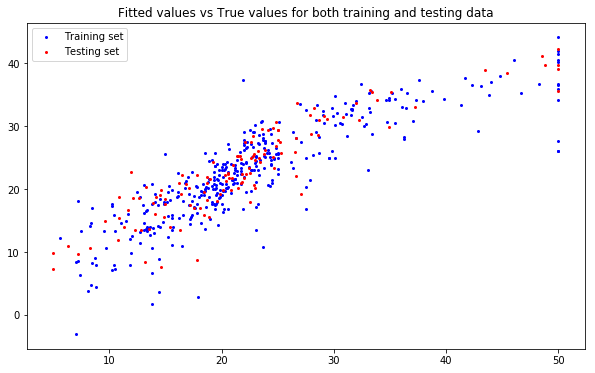

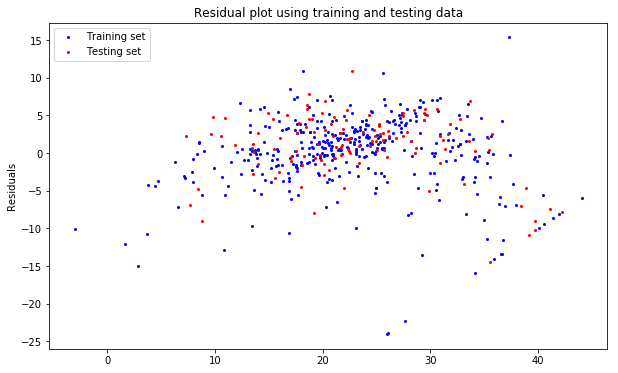

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)


# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=4, alpha=1)
plt.scatter(y_test, model.predict(X_test), c='r', s=4, alpha=1)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Fitted values vs True values for both training and testing data')
# plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='b', s=4, alpha=1)
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='r', s=4, alpha=1)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Residual plot using training and testing data')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])
# predicted_Y = model.predict(X_encoded)

# residual_values = np.linalg.norm(Y_encoded - model.predict(X_encoded)) ** 2

### Linear Regression with Regularization

##### LR with Ridge Regularization

Find best alpha

RMSE Testing for alpha=0 = 4.795078796774041
RMSE Testing for alpha=0.0001 = 4.795076197301017
RMSE Testing for alpha=0.001 = 4.79505286598024
RMSE Testing for alpha=0.01 = 4.794825803850561
RMSE Testing for alpha=0.02 = 4.794586515659876
RMSE Testing for alpha=0.03 = 4.794360428321342
RMSE Testing for alpha=0.04 = 4.7941470579361
RMSE Testing for alpha=0.05 = 4.793945939694505
RMSE Testing for alpha=0.1 = 4.793109095212381
RMSE Testing for alpha=0.5 = 4.792577150318558
RMSE Testing for alpha=1.0 = 4.797533126142694
RMSE Testing for alpha=2.5 = 4.812821214456551
RMSE Testing for alpha=5.0 = 4.826817617203146
RMSE Testing for alpha=10.0 = 4.83886297885758
RMSE Testing for alpha=50.0 = 4.88581238445629
RMSE Testing for alpha=100.0 = 4.942820050724715


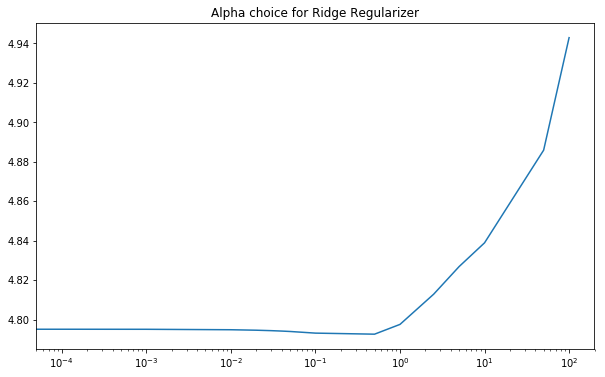

In [12]:
alphas = [0, 0.0001, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.5, 1.0, 2.5, 5.0, 10.0, 50.0, 100.0]
rmse_avgs = []
for alpha in alphas:
    model = Ridge(alpha=alpha)

    kf = KFold(n_splits=10)
    rmse_per_fold_test = []
    for trainset, testset in kf.split(X):
        X_train, X_test = X[trainset], X[testset]
        y_train, y_test = y[trainset], y[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))

    rmse_avgs.append(np.average(rmse_per_fold_test))
    
for idx, alpha in enumerate(alphas):
    print('RMSE Testing for alpha={} = {}'.format(alpha, rmse_avgs[idx]))
    
plt.semilogx(alphas, rmse_avgs)
plt.title('Alpha choice for Ridge Regularizer')
plt.show()

Best Ridge alpha: 0.1

In [13]:
alpha = 0.1
model = Ridge(alpha=alpha)

kf = KFold(n_splits=10)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
    print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
    print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

RMSE Training for fold 0 = 4.567652818003309
RMSE Testing for fold 0 = 5.654993741596625
RMSE Training for fold 1 = 4.8028362289214614
RMSE Testing for fold 1 = 3.3881613167900024
RMSE Training for fold 2 = 4.637896716569709
RMSE Testing for fold 2 = 5.077359685188718
RMSE Training for fold 3 = 4.729994218617216
RMSE Testing for fold 3 = 4.228062051876604
RMSE Training for fold 4 = 4.697603417477774
RMSE Testing for fold 4 = 4.612138219769725
RMSE Training for fold 5 = 4.744872826351623
RMSE Testing for fold 5 = 4.071064347511996
RMSE Training for fold 6 = 4.502851767961944
RMSE Testing for fold 6 = 6.262639285497596
RMSE Training for fold 7 = 4.674041953780371
RMSE Testing for fold 7 = 4.80854298899281
RMSE Training for fold 8 = 4.738254418260164
RMSE Testing for fold 8 = 4.176284574375661
RMSE Training for fold 9 = 4.563698506225454
RMSE Testing for fold 9 = 5.65184474052407
--
RMSE Training average = 4.665970287216902
RMSE Testing average  = 4.793109095212381
RMSE overall = 4.676442

##### LR with Lasso Regularization

Find best alpha

RMSE Testing for alpha=0.0001 = 4.795045977982971
RMSE Testing for alpha=0.001 = 4.794786534726362
RMSE Testing for alpha=0.01 = 4.795689546107088
RMSE Testing for alpha=0.02 = 4.804364037877323
RMSE Testing for alpha=0.03 = 4.8213616678465865
RMSE Testing for alpha=0.04 = 4.8456826708205
RMSE Testing for alpha=0.05 = 4.868280005436619
RMSE Testing for alpha=0.1 = 4.873306947033224
RMSE Testing for alpha=0.5 = 4.974435826078482
RMSE Testing for alpha=1.0 = 5.259587396780902
RMSE Testing for alpha=2.5 = 5.798604922439359
RMSE Testing for alpha=5.0 = 6.122977534722189
RMSE Testing for alpha=10.0 = 6.357586433356088
RMSE Testing for alpha=50.0 = 7.995828949185696
RMSE Testing for alpha=100.0 = 8.052629334854267


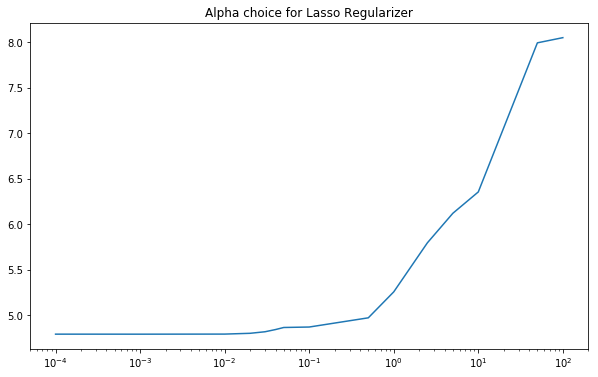

In [14]:
alphas = [0.0001, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.5, 1.0, 2.5, 5.0, 10.0, 50.0, 100.0]
rmse_avgs = []
for alpha in alphas:
    model = Lasso(alpha=alpha)

    kf = KFold(n_splits=10)
    rmse_per_fold_test = []
    for trainset, testset in kf.split(X):
        X_train, X_test = X[trainset], X[testset]
        y_train, y_test = y[trainset], y[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))

    rmse_avgs.append(np.average(rmse_per_fold_test))
    
for idx, alpha in enumerate(alphas):
    print('RMSE Testing for alpha={} = {}'.format(alpha, rmse_avgs[idx]))
    
plt.semilogx(alphas, rmse_avgs)
plt.title('Alpha choice for Lasso Regularizer')
plt.show()

Best Ridge alpha: 0.0001

In [15]:
alpha = 0.0001
model = Lasso(alpha=alpha)

kf = KFold(n_splits=10)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
    print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
    print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

RMSE Training for fold 0 = 4.567270018378987
RMSE Testing for fold 0 = 5.646995685822113
RMSE Training for fold 1 = 4.8023644995960035
RMSE Testing for fold 1 = 3.392727085491908
RMSE Training for fold 2 = 4.637506215151127
RMSE Testing for fold 2 = 5.06822305285639
RMSE Training for fold 3 = 4.729520338646462
RMSE Testing for fold 3 = 4.232805790902798
RMSE Training for fold 4 = 4.696990027572433
RMSE Testing for fold 4 = 4.635423799692334
RMSE Training for fold 5 = 4.744413121027353
RMSE Testing for fold 5 = 4.069294851934962
RMSE Training for fold 6 = 4.5024873123425335
RMSE Testing for fold 6 = 6.247256236913209
RMSE Training for fold 7 = 4.673586592289426
RMSE Testing for fold 7 = 4.809356216393062
RMSE Training for fold 8 = 4.73764714635544
RMSE Testing for fold 8 = 4.203667282873624
RMSE Training for fold 9 = 4.56328529766682
RMSE Testing for fold 9 = 5.6447097769493055
--
RMSE Training average = 4.665507056902659
RMSE Testing average  = 4.795045977982971
RMSE overall = 4.676064

##### LR with Elastic Net Regularization

Find best alpha

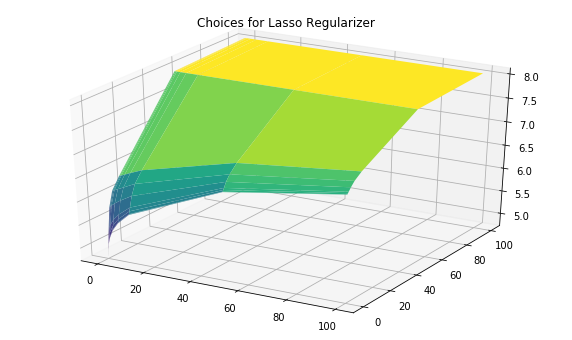

In [22]:
a_s = [0.0001, 0.0005, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.5, 1.0, 2.5, 5.0, 10.0, 50.0, 100.0]
b_s = [0.0001, 0.0005, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.5, 1.0, 2.5, 5.0, 10.0, 50.0, 100.0]
rmse_avgs = np.zeros((len(a_s), len(b_s)))
for adx, a in enumerate(a_s):
    for bdx, b in enumerate(b_s):
        alpha = a + b
        l1_ratio = a / (a + b)
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

        kf = KFold(n_splits=10)
        rmse_per_fold_test = []
        for trainset, testset in kf.split(X):
            X_train, X_test = X[trainset], X[testset]
            y_train, y_test = y[trainset], y[testset]
            model.fit(X_train, y_train)
            rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))

        rmse_avgs[adx, bdx] = np.average(rmse_per_fold_test)
        
from mpl_toolkits import mplot3d

def f(x, y):
    ret = np.zeros((len(x), len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            ret[i][j] = rmse_avgs[i][j]
#         ret.append([rmse_avgs[i][j] for j in range(len(y))])
    return ret
X_mesh, Y_mesh = np.meshgrid(a_s, b_s)
Z = f(X_mesh, Y_mesh)

ax = plt.axes(projection='3d')
ax.plot_surface(X_mesh, Y_mesh, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Choices for Lasso Regularizer')
plt.show()

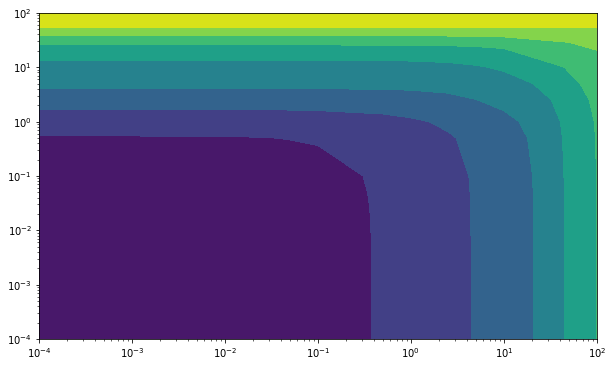

Best values: a=0.0001, b=0.0005


In [23]:
ax2 = plt.axes()
ax2.set_xscale("log") 
ax2.set_yscale("log")

ax2.contourf(X_mesh, Y_mesh, Z)
plt.show()

ind = np.unravel_index(np.argmin(rmse_avgs, axis=None), rmse_avgs.shape)
print("Best values: a={}, b={}".format(a_s[ind[0]], b_s[ind[1]]))

Best $\lambda_1$ = 0.0001
Best $\lambda_2$ = 0.0005

In [25]:
# a * L1 + b * L2
a = 0.0001
b = 0.0005

alpha = a + b
l1_ratio = a / (a + b)
model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

kf = KFold(n_splits=10)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
    print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
    print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

RMSE Training for fold 0 = 4.568993286791449
RMSE Testing for fold 0 = 5.664638574835526
RMSE Training for fold 1 = 4.80447623126437
RMSE Testing for fold 1 = 3.3844134980097214
RMSE Training for fold 2 = 4.639264032466177
RMSE Testing for fold 2 = 5.08857551391688
RMSE Training for fold 3 = 4.731648923494948
RMSE Testing for fold 3 = 4.223410271871046
RMSE Training for fold 4 = 4.699731327222047
RMSE Testing for fold 4 = 4.587108463344409
RMSE Training for fold 5 = 4.746474287578915
RMSE Testing for fold 5 = 4.074644563419383
RMSE Training for fold 6 = 4.504117583629816
RMSE Testing for fold 6 = 6.281892132008937
RMSE Training for fold 7 = 4.675641034587191
RMSE Testing for fold 7 = 4.808072358246063
RMSE Training for fold 8 = 4.7403653679263185
RMSE Testing for fold 8 = 4.146553594869789
RMSE Training for fold 9 = 4.565145653180202
RMSE Testing for fold 9 = 5.660874436745472
--
RMSE Training average = 4.667585772814143
RMSE Testing average  = 4.792018340726722
RMSE overall = 4.678129